In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [30]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/meta1"):
    df = pd.read_csv(f"../logs/experiment/meta1/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [39]:
namess = []
for name in names:
    new_name = name.split("_")[3:7]
    nn = ""
    for n in new_name:
        nn += n + "-"
    namess.append(nn[:-1])
names = namess

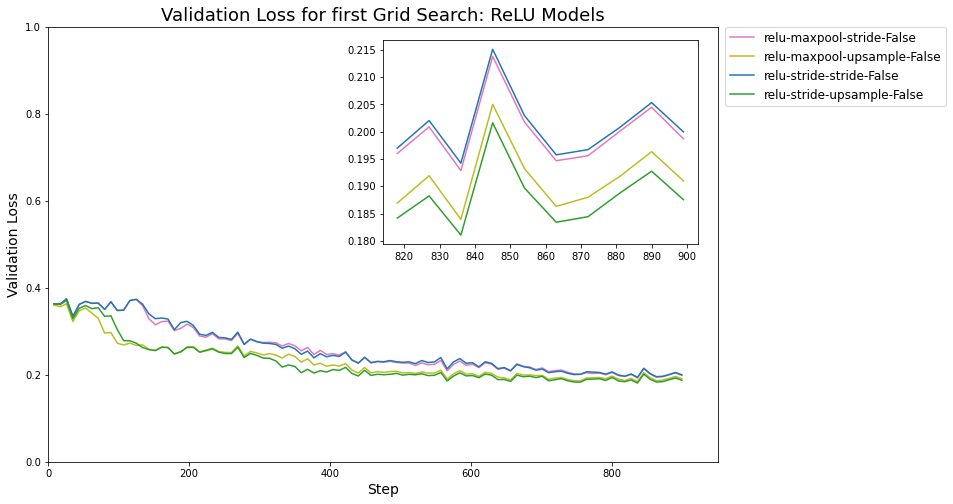

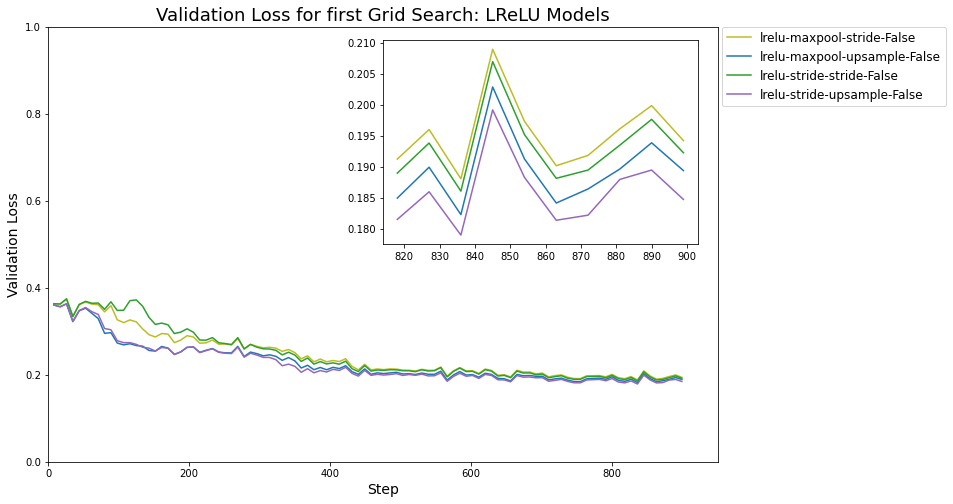

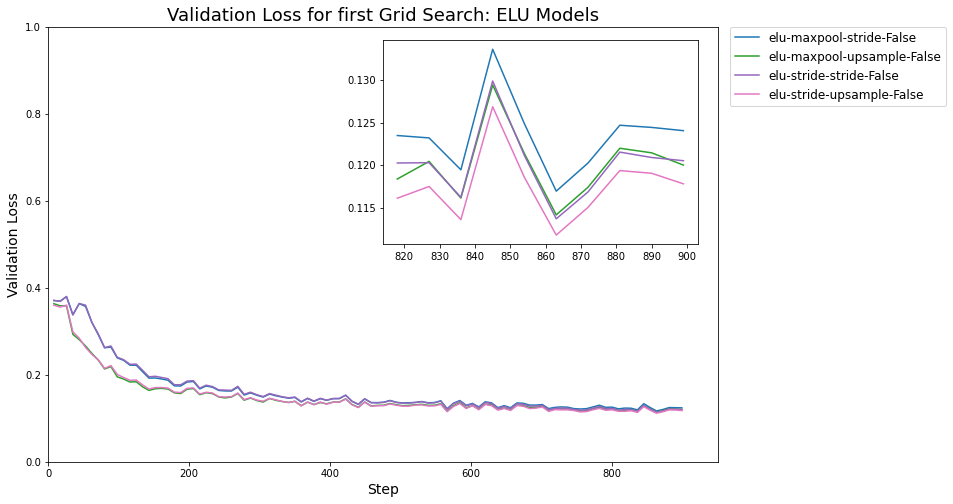

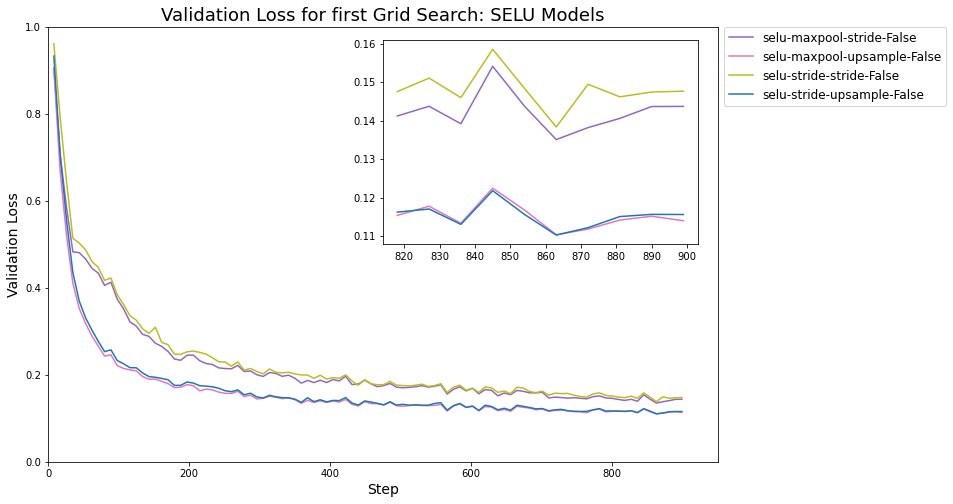

In [95]:
title_dict = {
    "r": "ReLU",
    "l": "LReLU",
    "e": "ELU",
    "s": "SELU",
}
for act in ["r", "l", "e", "s"]:
    fig, ax = plt.subplots(figsize=(12, 8))
    axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
    for i, df in enumerate(dfs):
        if not df["Value"].isnull().values.any():
            if names[i][0] == act:
                if names[i][-2] == "s":
                    ax.plot(df["Step"], df["Value"], label=names[i], color=f"C{i}")
                    if np.array(df["Step"])[-1] > 600:
                        axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{i}")
            
    plt.title(f"Validation Loss for first Grid Search: {title_dict[act]} Models", size=18)
    plt.xlabel("Step", size=14)
    plt.ylabel("Validation Loss", size=14)
    plt.ylim(0, 1)
    plt.xlim(0, 950)
    plt.legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
    plt.show()

In [79]:
activation_dict = {
    "relu": "ReLU",
    "lrelu": "LReLU",
    "elu": "ELU",
    "selu": "SELU",
}
downsampling_dict = {
    "maxpool": "Maxpooling",
    "stride": "Strided Convolution",
}
upsampling_dict = {
    "upsample": "Nearest Neighbour Upsampling",
    "stride": "Strided Convolution",
}
batchnorm_dict = {
    "True": "Enabled",
    "False": "Disabled",
}
for i, df in enumerate(dfs):
    df.dropna(inplace=True)
    meta = names[i].split("-")
    print(f"{np.round(np.array(df['Value']).min(), 6)} & {activation_dict[meta[0]]} &  {downsampling_dict[meta[1]]} &  {upsampling_dict[meta[2]]} &  {batchnorm_dict[meta[3]]}")

0.116936 & ELU &  Maxpooling &  Strided Convolution &  Disabled
0.370251 & ELU &  Maxpooling &  Strided Convolution &  Enabled
0.114145 & ELU &  Maxpooling &  Nearest Neighbour Upsampling &  Disabled
0.084513 & ELU &  Maxpooling &  Nearest Neighbour Upsampling &  Enabled
0.113682 & ELU &  Strided Convolution &  Strided Convolution &  Disabled
0.370238 & ELU &  Strided Convolution &  Strided Convolution &  Enabled
0.111767 & ELU &  Strided Convolution &  Nearest Neighbour Upsampling &  Disabled
0.087574 & ELU &  Strided Convolution &  Nearest Neighbour Upsampling &  Enabled
0.188042 & LReLU &  Maxpooling &  Strided Convolution &  Disabled
0.351211 & LReLU &  Maxpooling &  Strided Convolution &  Enabled
0.182255 & LReLU &  Maxpooling &  Nearest Neighbour Upsampling &  Disabled
0.163707 & LReLU &  Maxpooling &  Nearest Neighbour Upsampling &  Enabled
0.186044 & LReLU &  Strided Convolution &  Strided Convolution &  Disabled
0.35673 & LReLU &  Strided Convolution &  Strided Convolution &  

In [4]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/pacs_meta2"):
    df = pd.read_csv(f"../logs/experiment/pacs_meta2/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [5]:
namess = []
for name in names:
    new_name = name.split("_")[3:7]
    nn = ""
    for n in new_name:
        nn += n + "-"
    namess.append(nn[:-1])
names = namess

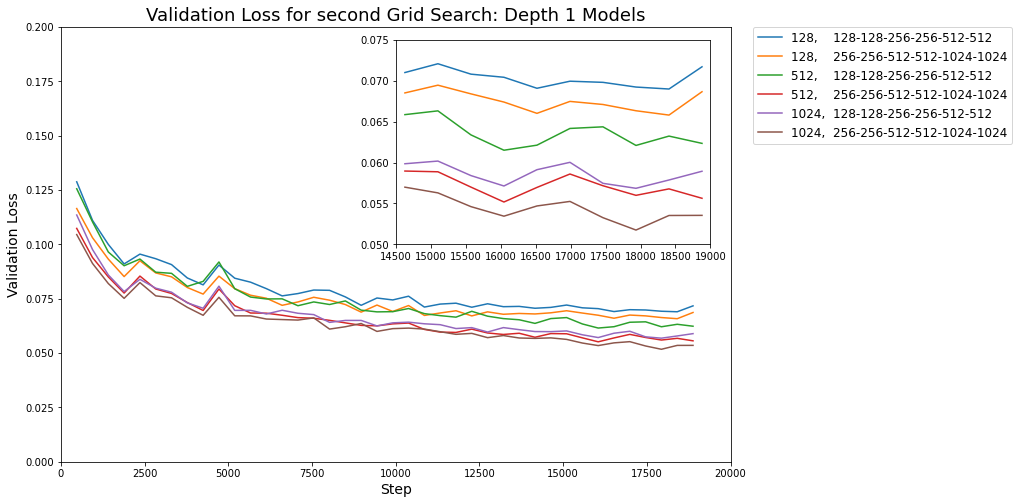

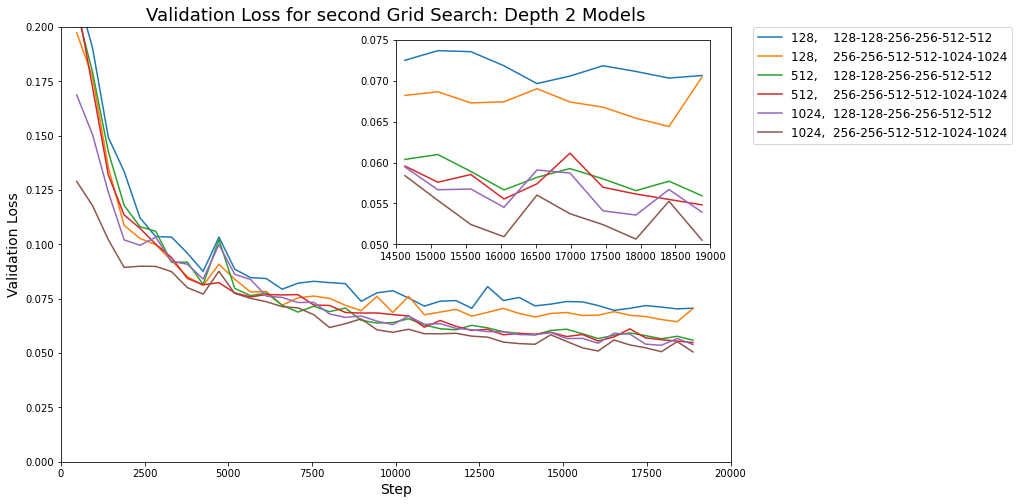

In [40]:
for depth in [1, 2]:
    k=0
    fig, ax = plt.subplots(figsize=(12, 8))
    axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
    for i, df in enumerate(dfs):
        name = names[i].split("-")
        if int(name[1]) == depth and name[0] != "1024":
            label = name[0] + ",  "
            if name[0] != "1024":
                label += "  "
            for j in range(2,8):
                label += name[j] + "-"
            ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
            if np.array(df["Step"])[-1] > 600:
                axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axins.set_ylim(0.05, 0.075)
                axins.set_xlim(14500, 19000)
            k+=1
    for i, df in enumerate(dfs):
        name = names[i].split("-")
        if int(name[1]) == depth and name[0] == "1024":
            label = name[0] + ",  "
            if name[0] != "1024":
                label += "  "
            for j in range(2,8):
                label += name[j] + "-"
            ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
            if np.array(df["Step"])[-1] > 600:
                axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axins.set_ylim(0.05, 0.075)
                axins.set_xlim(14500, 19000)
            k+=1
            
    plt.title(f"Validation Loss for second Grid Search: Depth {depth} Models", size=18)
    plt.xlabel("Step", size=14)
    plt.ylabel("Validation Loss", size=14)
    plt.ylim(0, 0.2)
    plt.xlim(0, 20000)
    plt.legend(bbox_to_anchor=(1.43,1.014), loc="upper right", fontsize=12)
    plt.show()

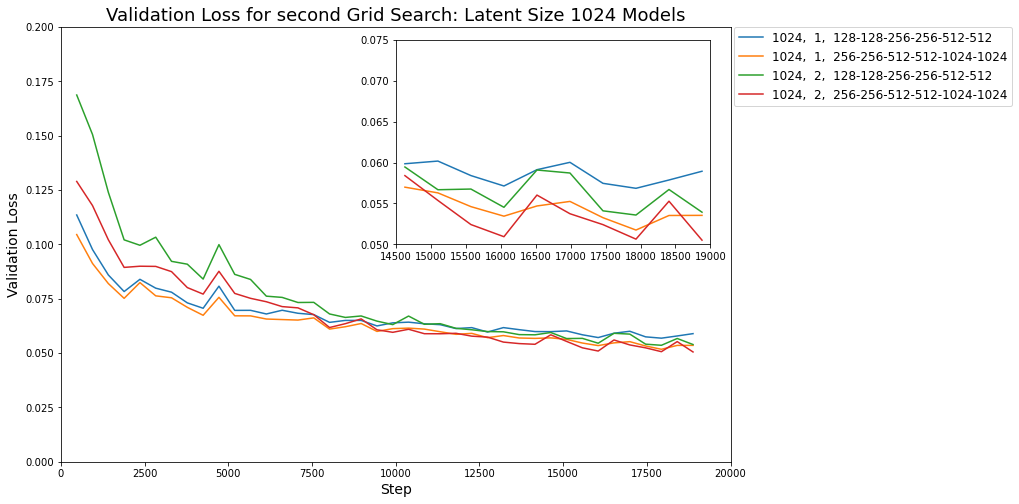

In [41]:
k=0
fig, ax = plt.subplots(figsize=(12, 8))
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
for i, df in enumerate(dfs):
    name = names[i].split("-")
    if name[0] == "1024":
        label = name[0] + ",  "
        if name[0] != "1024":
            label += "  "
        label += name[1] + ",  "
        for j in range(2,8):
            label += name[j] + "-"
        ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
        if np.array(df["Step"])[-1] > 600:
            axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
            axins.set_ylim(0.05, 0.075)
            axins.set_xlim(14500, 19000)
        k+=1
        
plt.title(f"Validation Loss for second Grid Search: Latent Size 1024 Models", size=18)
plt.xlabel("Step", size=14)
plt.ylabel("Validation Loss", size=14)
plt.ylim(0, 0.2)
plt.xlim(0, 20000)
plt.legend(bbox_to_anchor=(1.43,1.014), loc="upper right", fontsize=12)
plt.show()

In [46]:
for i, df in enumerate(dfs):
    # df.dropna(inplace=True)
    meta = names[i].split("-")
    depth = meta[1]
    latent_size = meta[0]
    out_channels = meta[2]
    for j in range(3,7):
        out_channels += ", " + meta[j]
    print(f"{np.round(np.array(df['Value']).min(), 6)} & {depth} & {latent_size} & {out_channels}")

0.056856 & 1 & 1024 & 128, 128, 256, 256, 512
0.05175 & 1 & 1024 & 256, 256, 512, 512, 1024
0.053586 & 2 & 1024 & 128, 128, 256, 256, 512
0.050514 & 2 & 1024 & 256, 256, 512, 512, 1024
0.069001 & 1 & 128 & 128, 128, 256, 256, 512
0.065813 & 1 & 128 & 256, 256, 512, 512, 1024
0.069666 & 2 & 128 & 128, 128, 256, 256, 512
0.064414 & 2 & 128 & 256, 256, 512, 512, 1024
0.061514 & 1 & 512 & 128, 128, 256, 256, 512
0.055181 & 1 & 512 & 256, 256, 512, 512, 1024
0.055941 & 2 & 512 & 128, 128, 256, 256, 512
0.054828 & 2 & 512 & 256, 256, 512, 512, 1024
